# Linear Regression Model for predicting student marks based on hours studied

   ##   By Hari Chandana Ghanta 

### Step 1: Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

### Step 2: Importing data

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [3]:
student = pd.DataFrame(data)

In [4]:
student.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
student.tail(5)

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


### Step 3: Visualizing data 

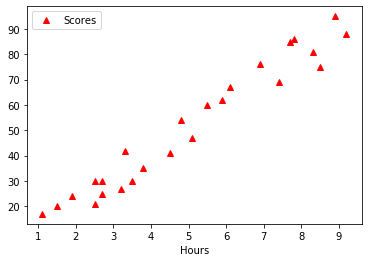

In [6]:
student.plot(x='Hours',y='Scores',style='^',color='red')
plt.show()

### Step 4: Seperating the independent and dependent variables

In [7]:
iv = student.iloc[:,:-1].values
dv = student.iloc[:,1].values.reshape(-1,1)

In [8]:
iv

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [9]:
dv

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]])

### Step 5: Splitting data into training and testing data

In [10]:
x_train,x_test,y_train,y_test = train_test_split(iv,dv,test_size = 0.2)

In [11]:
x_train

array([[1.9],
       [6.1],
       [1.1],
       [7.4],
       [3.8],
       [2.7],
       [8.3],
       [2.5],
       [2.5],
       [5.1],
       [5.5],
       [1.5],
       [3.2],
       [7.7],
       [5.9],
       [4.5],
       [8.9],
       [9.2],
       [3.3],
       [2.7]])

In [12]:
x_test

array([[4.8],
       [6.9],
       [7.8],
       [8.5],
       [3.5]])

In [13]:
y_train

array([[24],
       [67],
       [17],
       [69],
       [35],
       [25],
       [81],
       [21],
       [30],
       [47],
       [60],
       [20],
       [27],
       [85],
       [62],
       [41],
       [95],
       [88],
       [42],
       [30]])

In [14]:
y_test

array([[54],
       [76],
       [86],
       [75],
       [30]])

### Step 6: Training the algorithm using train dataset

In [15]:
lr = LinearRegression()

In [16]:
lr.fit(x_train,y_train) #The message displayed below conveys that training was successful

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Step 7: Plotting the linear regression line

In [17]:
line = (lr.coef_*iv) + (lr.intercept_)

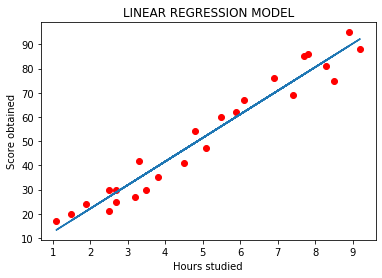

In [18]:
plt.scatter(iv,dv,color='red')
plt.plot(iv,line)
plt.title("LINEAR REGRESSION MODEL")
plt.xlabel("Hours studied")
plt.ylabel("Score obtained")
plt.show()

### Step 8: Predicting student marks 

In [19]:
y_pred = lr.predict(x_test) #since we alrady have the marks for x_test dataset
y_pred

array([[49.37167314],
       [69.83088764],
       [78.59912243],
       [85.4188606 ],
       [36.70644512]])

### Step 9: Comparing predicted marks with original marks

In [20]:
comparison = pd.DataFrame({'Predicted': y_pred.flatten(), 'Original':y_test.flatten()})

In [21]:
comparison

,Predicted,Original
0,49.371673,54
1,69.830888,76
2,78.599122,86
3,85.418861,75
4,36.706445,30


### Step 10: Predicting the unknown marks 

In [22]:
def predict_unknown(hours):
    unknown = np.array([hours]).reshape(-1, 1)
    return float(lr.predict(unknown))

In [23]:
print('Predicted marks:', predict_unknown(float(input("Enter the hours studied by the student: "))))

Enter the hours studied by the student: 9.25
Predicted marks: 92.7257229175658


### Step 11: Evaluating the linear model

In [24]:
print("Mean squared error:",metrics.mean_squared_error(y_test,y_pred))

Mean squared error: 53.55628156679133


In [25]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 7.06472450007193
